# Collaboration and Competition

---

The notebook shows how you can train TD3 agents to 'solve' the Tennis Unity environment. It is the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Setup the environment

If you've not already done so, read the README's Getting started section to set up the environment

### Training the TD3 agent

An agent can be trained from a Jupyter notebook or from the command line (using run_agent.py).

Be aware that training an agent can take a long time. You may want to see trained agents in action first.

Skip to 'Testing the agent' if that's what you want to do.


In [8]:
from lib.environments import UnityEnv
from lib.td3_agent import TD3_Agent


from run_agent import *

In [ ]:
train_mode = True
RANDOM_SEED = 2


name = 'Tennis_TD3'
linux_exe = './Tennis_linux/Tennis.x86_64'
mac_exe = './Tennis.app'
unity_exe = linux_exe

env = UnityEnv('Tennis', unity_exe, train_mode=train_mode)

for i in range(env.num_agents):
    agent = agent_fn(name=f'{name}-{i}',
                     state_size=env.state_size,
                     action_size=env.action_size,
                     random_seed=RANDOM_SEED,
                     warm_up=int(1e3),)
    agents.append(agent)

max_episodes = int(5000)
train_agent(args.name, env, agents, max_episodes=max_episodes)



### View episode scores during training
The scores of episodes during training are stored in a csv file, which can be loaded using pandas.

Please note that the name of the results csv file is the same (excluding the extension) as the name supplied when training. So if the name of the agent is `Tennis_TD3` the model agents state will be stored in `Tennis_TD3-0.pth` and `Tennis_TD3-1.pth` for the two agents and the results during training will be stored in `Tennis_TD3_training_scores.csv` 

An average score of 0.5+ is achieved after 496 episodes


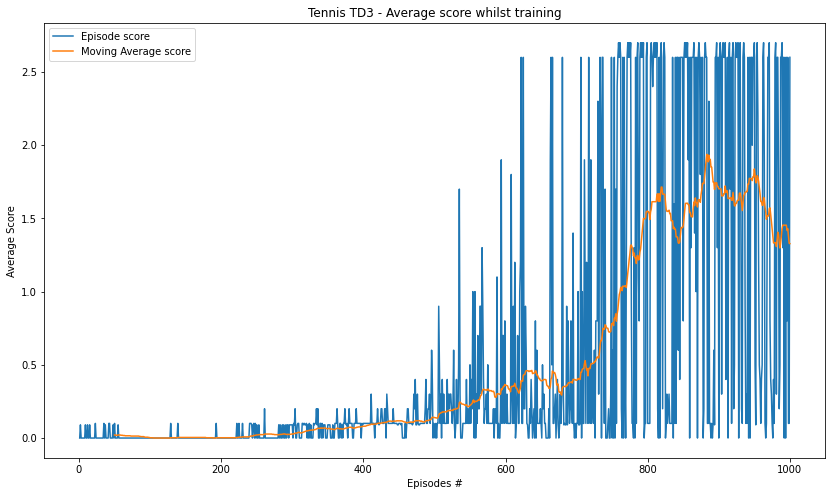

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

df = pd.read_csv('Tennis_TD3_training_scores.csv')
df['moving_average'] = df['score'].rolling(window=50).mean()


first_row_solved = df[df['score'] > 0.5].iloc[0]
print(f'An average score of 0.5+ is achieved after {round(first_row_solved.episodes)} episodes')

plt.rcParams["figure.figsize"] = (14,8)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Tennis TD3 - Average score whilst training')
plt.plot(df['episodes'], df['score'])
plt.ylabel('Average Score')
plt.xlabel('Episodes #')
plt.plot(df['episodes'], df['moving_average'])

plt.legend(["Episode score", "Moving Average score"])

plt.savefig('tennis_td3_learning_rate')

### Testing the agent

Again the trained agent can be tested either from a notebook or command line (using run_agent.py)

In [1]:
from lib.environments import UnityEnv
from lib.td3_agent import TD3_Agent

from run_agent import *

RANDOM_SEED = 2

train_mode = False

name = 'Tennis_TD3_Trained'

env = UnityEnv('Tennis', './Tennis_Linux/Tennis.x86_64', train_mode=train_mode)
agents = []
for i in range(env.num_agents):
    agent = TD3_Agent(name=f'{name}-{i}',
                      state_size=env.state_size,
                      action_size=env.action_size,
                      random_seed=RANDOM_SEED,
                     )
    agents.append(agent)

# load saved model weights
load_agents(agents)

n_episodes = 100
average_reward = eval_episodes(name, env, agents, num_episodes=n_episodes)
print(f'average score for {n_episodes} episodes is {average_reward}')

running on cpu
running on cpu


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


brain_name: TennisBrain
Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
Episode: 1 average so far 0.10000000149011612
Episode: 2 average so far 0.10000000149011612
Episode: 3 average so far 0.10000000149011612
Episode: 4 average so far 0.10000000149011612
Episode: 5 average so far 0.09800000153481961
Episode: 6 average so far 0.5150000077361861
Episode: 7 average so far 0.8128571550228766
Episode: 8 average so far 1.0362500154878944
Episode: 9 average so far 1.2100000180717971
Episode: 10 average so far 1.3490000201389194
Episode: 11 average so far 1.4627272945574739
Episode: 12 average so far 1.5575000232396026
Episode: 13 ave

The scores of the test run are stored in a file of the agent's name + `test-results.csv`  

Results running 100 epsiodes of trained TD3 agent

The average score for 100 episodes is 2.35


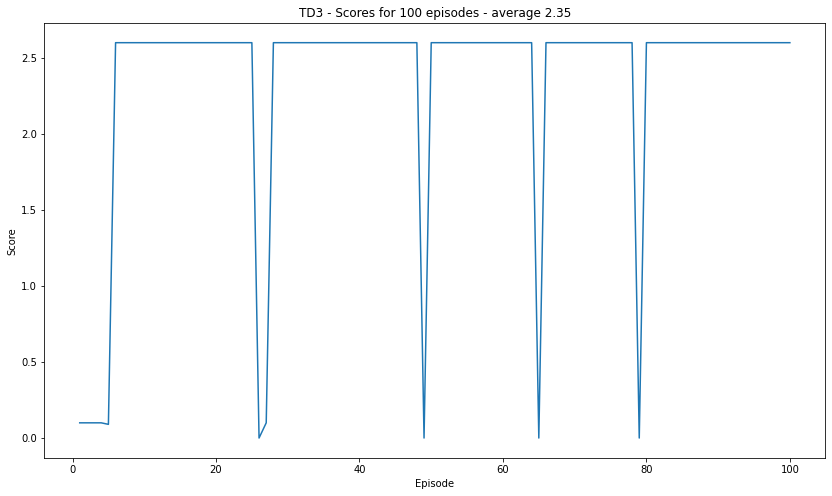

In [2]:
# Test agent results
df = pd.read_csv('Tennis_TD3_Trained-test-results.csv')

print('Results running 100 epsiodes of trained TD3 agent\n')
print(f'The average score for 100 episodes is {round(df.score.mean(), 2)}')

plt.rcParams["figure.figsize"] = (14,8)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('TD3 - 100 episodes of trained agent')
ax.set_title(f'TD3 - Scores for 100 episodes - average {round(df.score.mean(), 2)}')
ax.set_ylabel('Score')
ax.set_xlabel('Episode')
plt.plot(range(1, len(df) +1), df.score)


plt.savefig('tennis_td3_test_scores')